<a href="https://colab.research.google.com/github/aleluiz02/MachineLearningFundamentals/blob/main/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse projeto calcula as métricas de avaliação de um modelo de classificação binária (Acurácia, Sensibilidade, Especificidade, Precisão, F1-Score e Curva ROC) a partir de uma matriz de confusão simulada

In [ ]:
# Importar bibliotecas
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## Matriz de confusão simulada

 Definir y_true e y_pred para a matriz de confusão desejada
* Matriz desejada: TP=50, FN=10, FP=15, TN=75
* Total: 50 + 10 + 15 + 75 = 150 amostras
* y_true: 60 positivos (50 TP + 10 FN), 90 negativos (15 FP + 75 TN)
* y_pred: 65 positivos (50 TP + 15 FP), 85 negativos (10 FN + 75 TN)

In [ ]:
# Matriz de confusão simulada
# TP = 50, FN = 10, FP = 15, TN = 75
y_true = [1] * 60 + [0] * 90  # 60 positivos, 90 negativos
y_pred = [1] * 50 + [0] * 10 + [1] * 15 + [0] * 75  # 50 TP, 10 FN, 15 FP, 75 TN

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Matriz de Confusão:")
print(cm)
print(f"TP: {tp}, FN: {fn}, FP: {fp}, TN: {tn}")

Matriz de Confusão:
[[75 15]
 [10 50]]
TP: 50, FN: 10, FP: 15, TN: 75


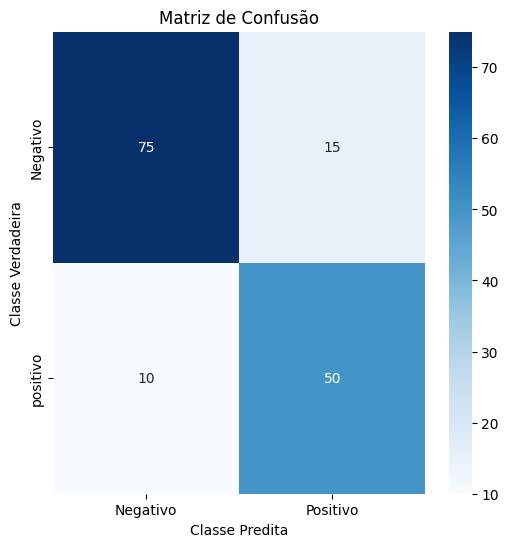

In [ ]:
# Visualizar a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'positivo'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

## Calcular metrica

* Acurácia = (VP + VN) / (VP + VN + FP + FN)
* Sensibilidade (Recall) = VP / (VP + FN)
* Especificidade = VN / (VN + FP)
* Precisão = VP / (VP + FP)
* F1-Score = 2 × (Precisão × Sensibilidade) / (Precisão + Sensibilidade)

In [ ]:
# Total de amostras
N = tn + tp + fn + fp
print(N)

150


In [ ]:
# Calcular métricas
accuracy = (tp + tn)/ N
precision = tp / (tp + fp)
recall = tp / (tp + fn)  # Sensibilidade
specificity = tn / (tn + fp)  # Especificidade = TN / (TN + FP)
f1 = 2 * (precision * recall) /  (precision + recall)

In [ ]:
# Exibir métricas
print(f"\nMétricas:")
print(f"Acurácia: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precisão: {precision:.4f} ({precision*100:.2f}%)")
print(f"Sensibilidade (Recall): {recall:.4f} ({recall*100:.2f}%)")
print(f"Especificidade: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")


Métricas:
Acurácia: 0.8333 (83.33%)
Precisão: 0.7692 (76.92%)
Sensibilidade (Recall): 0.8333 (83.33%)
Especificidade: 0.8333 (83.33%)
F1-Score: 0.8000 (80.00%)


In [ ]:
# 2. Calcular métricas
accuracy1 = accuracy_score(y_true, y_pred)
precision1 = precision_score(y_true, y_pred)
recall1 = recall_score(y_true, y_pred)  # Sensibilidade
specificity1 = tn / (tn + fp)  # Especificidade = TN / (TN + FP)
F1 = f1_score(y_true, y_pred)

In [ ]:
# Exibir métricas
print(f"\nMétricas:")
print(f"Acurácia: {accuracy1:.4f} ({accuracy1*100:.2f}%)")
print(f"Precisão: {precision1:.4f} ({precision1*100:.2f}%)")
print(f"Sensibilidade (Recall): {recall1:.4f} ({recall1*100:.2f}%)")
print(f"Especificidade: {specificity1:.4f} ({specificity1*100:.2f}%)")
print(f"F1-Score: {F1:.4f} ({F1*100:.2f}%)")


Métricas:
Acurácia: 0.8333 (83.33%)
Precisão: 0.7692 (76.92%)
Sensibilidade (Recall): 0.8333 (83.33%)
Especificidade: 0.8333 (83.33%)
F1-Score: 0.8000 (80.00%)


## Curva Roc e AUC

A curva ROC (Receiver Operating Characteristic) é um gráfico que plota a Sensibilidade (True Positive Rate) no eixo y contra a taxa de falsos positivos (1 - Especificidade) no eixo x, para diferentes limiares de classificação. A AUC (Area Under the Curve) mede a área sob a curva ROC, indicando a capacidade do modelo de distinguir entre classes (valores próximos de 1 indicam bom desempenho).
Passos para construir a curva ROC:

* Obter as probabilidades previstas: Para cada amostra, o modelo de classificação binária geralmente fornece uma probabilidade (ou score) de pertencer à classe positiva.
* Variar o limiar de classificação: Para cada limiar (ex.: 0,1, 0,2, ..., 0,9), calcular TP, FN, FP, TN e, consequentemente:

 * Sensibilidade ($ \frac{TP}{TP + FN} $).
 * Taxa de Falsos Positivos (FPR): $ \frac{FP}{FP + TN} = 1 - \text{Especificidade} $.


* Plotar os pontos: Cada limiar gera um par (FPR, Sensibilidade). Esses pontos são conectados para formar a curva ROC.
* Calcular a AUC: A área sob a curva pode ser estimada usando métodos como a soma de trapézios entre os pontos.

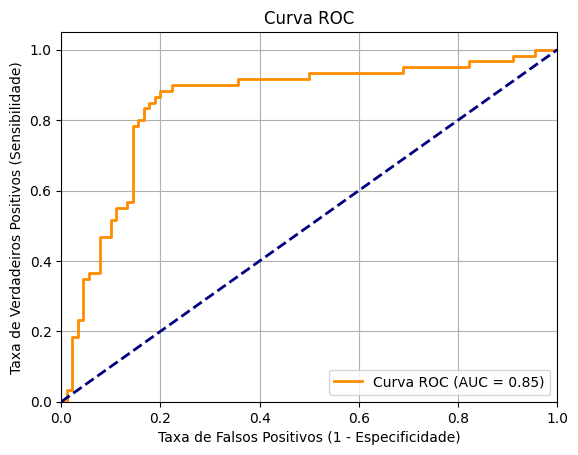

In [ ]:
# Curva ROC e AUC
# Simular probabilidades previstas para a classe positiva
np.random.seed(42)  # Para reproducibilidade
y_scores = np.concatenate([
    np.random.uniform(0.7, 1.0, 50),  # Probabilidades para TP (altas)
    np.random.uniform(0.0, 0.3, 10),  # Probabilidades para FN (baixas)
    np.random.uniform(0.0, 0.3, 75),  # Probabilidades para TN (baixas)
    np.random.uniform(0.7, 1.0, 15)   # Probabilidades para FP (altas)
])

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()